In [1]:
from latentmi import lmi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc 
from tqdm.notebook import tqdm
import os

import scanpy.external as sce

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# base directory for embeddings
embeddings_dir = '../embeddings/PBMC_CITEseq/'
results = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(embeddings_dir):
    quality_path = os.path.join(embeddings_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # find held-out cells
    held_out_path = os.path.join(quality_path, 'held_out_cells.h5ad')
    held_out = sc.read_h5ad(held_out_path)

    UMI_per_cell = held_out.raw.X.sum()/len(held_out)

    protein_counts = held_out.obsm['protein_counts']

    celltype_coarse = pd.get_dummies(held_out.obs['celltype.l1']).to_numpy()
    celltype_fine = pd.get_dummies(held_out.obs['celltype.l3']).to_numpy()

    # loop through embedding files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('.npy'):
            continue

        # extract method and fraction from filename
        method, frac = file.split('_')
        frac = frac[4:-4]

        if method == 'VAE' and frac=='1.000':

            # load embeddings
            embedding_path = os.path.join(quality_path, file)
            embeddings = np.load(embedding_path)

            held_out.obsm['X_'+method] = embeddings
            sce.pp.harmony_integrate(held_out, 'donor', basis='X_'+method, adjusted_basis='integrated')

            embeddings = held_out.obsm['integrated']

            # estimate MI
            pmis, _, _ = lmi.estimate(embeddings, protein_counts, quiet=True, batch_size=2048)
            protein_mi = np.nanmean(pmis)

            # estimate MI for cell type
            pmis, _, _ = lmi.estimate(embeddings, celltype_coarse, quiet=True, batch_size=2048)
            ct_coarse_mi = np.nanmean(pmis)

            pmis, _, _ = lmi.estimate(embeddings, celltype_fine, quiet=True, batch_size=2048)
            ct_fine_mi = np.nanmean(pmis)

            # save result
            results.append({
                'Quality': quality_dir.split('_')[0],
                'UMI per cell' : UMI_per_cell,
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),

                # watch out ! this needs to be tweaked if we change hold out size
                'Cell number' : int(float(frac)*3*len(held_out)),
                'Method': method,
                'Protein MI': protein_mi,
                'Cell type coarse MI': ct_coarse_mi,
                'Cell type fine MI': ct_fine_mi
            })

Processing Q0.001_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:40:18,486 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:40:20,526 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:40:20,679 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:40:26,982 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:40:33,859 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:40:39,692 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:40:42,091 - harmonypy - INFO - Converged after 4 iterations


epoch 218 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.002_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:42:47,800 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:42:49,716 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:42:49,849 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:42:56,300 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:43:02,852 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:43:09,614 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:43:14,655 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:43:19,565 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:43:22,705 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:43:25,537 - harmonypy - INFO - Iteration 8 of 10
2025-03-26 09:43:32,527 - harmonypy - INFO - Iteration 9 of 10
2025-03-26 09:43:35,184 - harmonypy - INFO - Iteration 10 of 10
2025-03-26 09:43:37,642 - harmonypy - INFO - Stopped before convergence


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.005_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:45:37,881 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:45:39,781 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:45:39,938 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:45:46,154 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:45:52,528 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:45:58,187 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:46:03,076 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:46:07,002 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:46:09,840 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:46:12,821 - harmonypy - INFO - Iteration 8 of 10
2025-03-26 09:46:15,245 - harmonypy - INFO - Iteration 9 of 10
2025-03-26 09:46:17,600 - harmonypy - INFO - Iteration 10 of 10
2025-03-26 09:46:24,160 - harmonypy - INFO - Stopped before convergence


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.010_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:48:41,937 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:48:43,892 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:48:44,026 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:48:50,241 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:48:56,716 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:49:02,122 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:49:05,368 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:49:07,829 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:49:09,925 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:49:12,066 - harmonypy - INFO - Converged after 7 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.022_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:51:26,014 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:51:27,943 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:51:28,077 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:51:34,279 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:51:40,605 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:51:47,008 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:51:50,673 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:51:53,375 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:51:55,787 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:51:58,531 - harmonypy - INFO - Converged after 7 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.046_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:54:13,806 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:54:16,118 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:54:16,263 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:54:23,349 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:54:30,819 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:54:39,392 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:54:46,785 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:54:53,888 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:54:57,642 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:55:00,252 - harmonypy - INFO - Converged after 7 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.100_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 09:57:15,421 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 09:57:17,434 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 09:57:17,582 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 09:57:25,284 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 09:57:33,246 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 09:57:41,629 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 09:57:49,519 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 09:57:54,500 - harmonypy - INFO - Iteration 6 of 10
2025-03-26 09:57:58,226 - harmonypy - INFO - Iteration 7 of 10
2025-03-26 09:58:02,393 - harmonypy - INFO - Iteration 8 of 10
2025-03-26 09:58:05,503 - harmonypy - INFO - Iteration 9 of 10
2025-03-26 09:58:08,305 - harmonypy - INFO - Converged after 9 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.215_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 10:00:21,580 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 10:00:23,551 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 10:00:23,688 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 10:00:29,910 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 10:00:36,436 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 10:00:43,017 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 10:00:49,838 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 10:00:55,343 - harmonypy - INFO - Converged after 5 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q0.464_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 10:03:15,198 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 10:03:17,135 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 10:03:17,273 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 10:03:24,168 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 10:03:30,761 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 10:03:37,237 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 10:03:44,088 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 10:03:49,606 - harmonypy - INFO - Converged after 5 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

Processing Q1.000_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

2025-03-26 10:06:08,218 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-26 10:06:10,359 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-26 10:06:10,492 - harmonypy - INFO - Iteration 1 of 10
2025-03-26 10:06:17,299 - harmonypy - INFO - Iteration 2 of 10
2025-03-26 10:06:24,273 - harmonypy - INFO - Iteration 3 of 10
2025-03-26 10:06:31,172 - harmonypy - INFO - Iteration 4 of 10
2025-03-26 10:06:37,967 - harmonypy - INFO - Iteration 5 of 10
2025-03-26 10:06:41,071 - harmonypy - INFO - Converged after 5 iterations


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

In [3]:
df = pd.DataFrame(results)
df

,Quality,UMI per cell,Replicate,Fraction,Cell number,Method,Protein MI,Cell type coarse MI,Cell type fine MI
0,Q0.001,8.166369,rep0,1.0,114072,VAE,0.354432,0.257820,0.459739
1,Q0.002,17.570824,rep0,1.0,114072,VAE,0.844792,0.745017,0.778365
2,Q0.005,37.813854,rep0,1.0,114072,VAE,1.195241,1.069279,1.200008
3,Q0.010,81.572875,rep0,1.0,114072,VAE,1.662619,1.381124,1.639269
4,Q0.022,175.686961,rep0,1.0,114072,VAE,2.132299,1.627649,2.059761
5,Q0.046,378.499053,rep0,1.0,114072,VAE,2.489234,1.838082,2.402619
6,Q0.100,815.553808,rep0,1.0,114072,VAE,2.788848,1.993071,2.706063
7,Q0.215,1756.944772,rep0,1.0,114072,VAE,3.142430,2.113016,3.032517
8,Q0.464,3784.577635,rep0,1.0,114072,VAE,3.472368,2.248280,3.368002
9,Q1.000,8153.868320,rep0,1.0,114072,VAE,3.644833,2.321804,3.581468


In [4]:
df.to_csv('../results/PBMC_CITEseq_Harmony_scaling.csv')

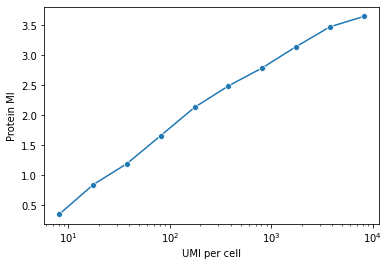

In [10]:
sns.lineplot(data=df, x='UMI per cell', y='Protein MI', marker='o')
plt.xscale('log')
plt.xscale('log')